<a href="https://colab.research.google.com/github/OlenaIVA/PET-projects/blob/main/Market_Basket_Analysis_Exploring_Sales_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Market Basket Analysis
Analyzing Consumer Behaviour Using MBA Association Rule Mining

In [1]:
import numpy as np  # Import numpy library for efficient array operations
import pandas as pd  # Import pandas library for data processing
import matplotlib.pyplot as plt  # Import matplotlib.pyplot for data visualization
import seaborn as sns # Import seaborn for visualization relating data
from datetime import datetime # import datetime for working with date and time
from mlxtend.frequent_patterns import association_rules, apriori  # Importing apriori, frequent pattern analysis


In [2]:
# Load the dataset
df = pd.read_csv('/content/Assignment-1_Data.csv',  sep=';',parse_dates=['Date'], dtype={'Price': str})



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-2-10b106f81adb>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Assignment-1_Data.csv',  sep=';',parse_dates=['Date'], dtype={'Price': str})


In [36]:
# Basic Info and Overview
print("\nFirst Few Rows of the DataFrame:\n")
display(df.head())
df.info()
# Summary statistics for numeric columns
print("\nSummary Statistics:\n")
display(df.describe(include='all'))



First Few Rows of the DataFrame:



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,255,17850.0,United Kingdom,2010.0,1.0,12.0
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,339,17850.0,United Kingdom,2010.0,1.0,12.0
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,275,17850.0,United Kingdom,2010.0,1.0,12.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,339,17850.0,United Kingdom,2010.0,1.0,12.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,339,17850.0,United Kingdom,2010.0,1.0,12.0


<class 'pandas.core.frame.DataFrame'>
Index: 131543 entries, 0 to 289265
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      131543 non-null  object        
 1   Itemname    131543 non-null  object        
 2   Quantity    131543 non-null  int64         
 3   Date        131543 non-null  datetime64[ns]
 4   Price       131543 non-null  int64         
 5   CustomerID  93277 non-null   float64       
 6   Country     131543 non-null  object        
 7   Year        131543 non-null  float64       
 8   Month       131543 non-null  float64       
 9   Day         131543 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 11.0+ MB

Summary Statistics:



,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day
count,131543.0,131543,131543.000000,131543,1.315430e+05,93277.000000,131543,131543.000000,131543.000000,131543.000000
unique,5305.0,3502,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN
top,537434.0,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom,NaN,NaN,NaN
freq,675.0,724,NaN,NaN,NaN,NaN,123268,NaN,NaN,NaN
mean,NaN,NaN,9.659343,2011-04-15 21:30:09.805766912,4.028295e+02,15318.546694,NaN,2010.802764,6.655139,6.163939
min,NaN,NaN,-5368.000000,2010-01-12 08:26:00,0.000000e+00,12347.000000,NaN,2010.000000,1.000000,1.000000
25%,NaN,NaN,1.000000,2011-01-08 12:16:00,1.060000e+02,13842.000000,NaN,2011.000000,4.000000,3.000000
50%,NaN,NaN,3.000000,2011-06-01 11:25:00,1.950000e+02,15296.000000,NaN,2011.000000,7.000000,6.000000
75%,NaN,NaN,10.000000,2011-09-03 15:20:00,4.130000e+02,16919.000000,NaN,2011.000000,9.000000,8.000000
max,NaN,NaN,4000.000000,2011-12-08 16:54:00,1.354133e+06,18283.000000,NaN,2011.000000,12.000000,12.000000


In [40]:
# Basic Info and Overview

print("\nMissing Values:\n")
print(display(df.isnull().sum()))

# Convert 'Date' to datetime format and 'Price' to numeric after cleaning
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Price'] = df['Price'].astype(str)
df['Price'] = pd.to_numeric(df['Price'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')


# Drop rows with missing Itemname or Price
df = df.dropna(subset=['Itemname', 'Price'])



Missing Values:



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
BillNo,0
Itemname,0
Quantity,0
Date,0
Price,0
CustomerID,38266
Country,0
Year,0
Month,0
Day,0


None


Dataset Overview:
<br> Number of Columns: 7
<br> Number of Rows: 520,609
<br> Memory Usage: 31.8 MB

Column Details:
<br> BillNo: Object type (No missing values)
<br> Itemname: Object type (No missing values)
<br> Quantity: Integer type (No missing values)
<br> Date: Datetime type (296,738 missing values)
<br> Price: Integer type (No missing values)
<br> CustomerID: Float type (132,586 missing values)
<br> Country: Object type (No missing values)
<br> Missing Values Summary:
<br> Date: 296,738 missing values
<br> CustomerID: 132,586 missing values
<br> Statistical Summary:

Quantity:
<br> Mean: 10.15
<br> Min: -9,600 (indicating possible errors or returns)
<br> Max: 80,995
<br> Standard Deviation: 160.82

Date:
<br> Earliest Date: 2010-01-12
<br> Latest Date: 2011-12-10

Price:
<br> Mean: 357.76
<br> Min: 0
<br> Max: 1,354,133
<br> Standard Deviation: 4,104.35

CustomerID:
<br> Mean: 15,316.93
<br> Min: 12,346
<br> Max: 18,287
<br> Standard Deviation: 1,721.85

Key Insights:
<br> There are a significant number of missing values in the Date and CustomerID columns.
The Quantity column has unusually high negative values, indicating data quality issues.
The Price column contains a wide range of values, with a high maximum and standard deviation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


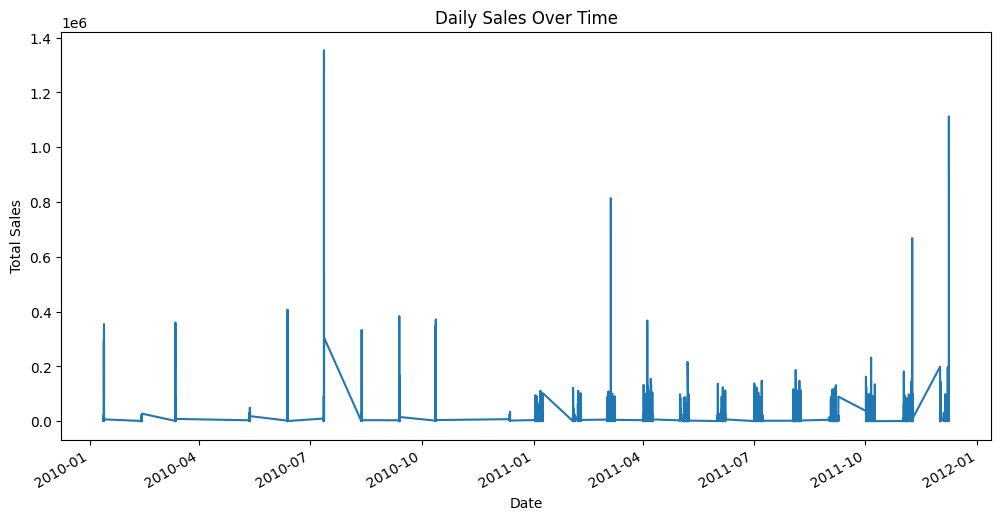

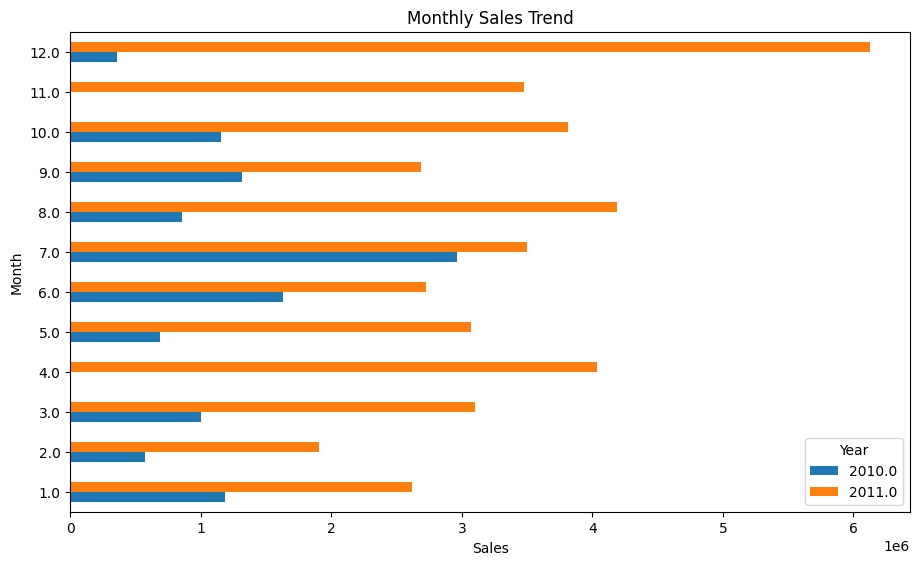

In [4]:
# 1. Sales Trend Analysis by Date

# Extract year, month, and day from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Plotting daily sales trends
daily_sales = df.groupby('Date')['Price'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(title='Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.show()

# Monthly sales trends
df = df[df['Year'].isin([df['Year'].max() - 1, df['Year'].max()])]

# Group by Year and Month, sum the prices
monthly_sales = df.groupby(['Year', 'Month'])['Price'].sum().unstack()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the horizontal bars
monthly_sales.T.plot(kind='barh', ax=ax)

# Set the title, axis labels, and legend
ax.set_title('Monthly Sales Trend')
ax.set_xlabel('Sales')
ax.set_ylabel('Month')
ax.legend(title='Year')

# Adjust the spacing
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

plt.show()


Sales in 2011 are consistently higher than in 2010, indicating business growth.
December 2011 shows the highest sales, likely due to the holiday season.
Mid-year months (June and July 2011) also show notable activity, suggesting possible mid-year promotions or events.Sales in 2010 are minimal, with limited activity in most months.
<br>The line chart highlights occasional sharp spikes in sales, possibly due to special events, large orders, or data anomalies.
<br>The business experienced significant growth in 2011, with clear seasonal effects in December.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


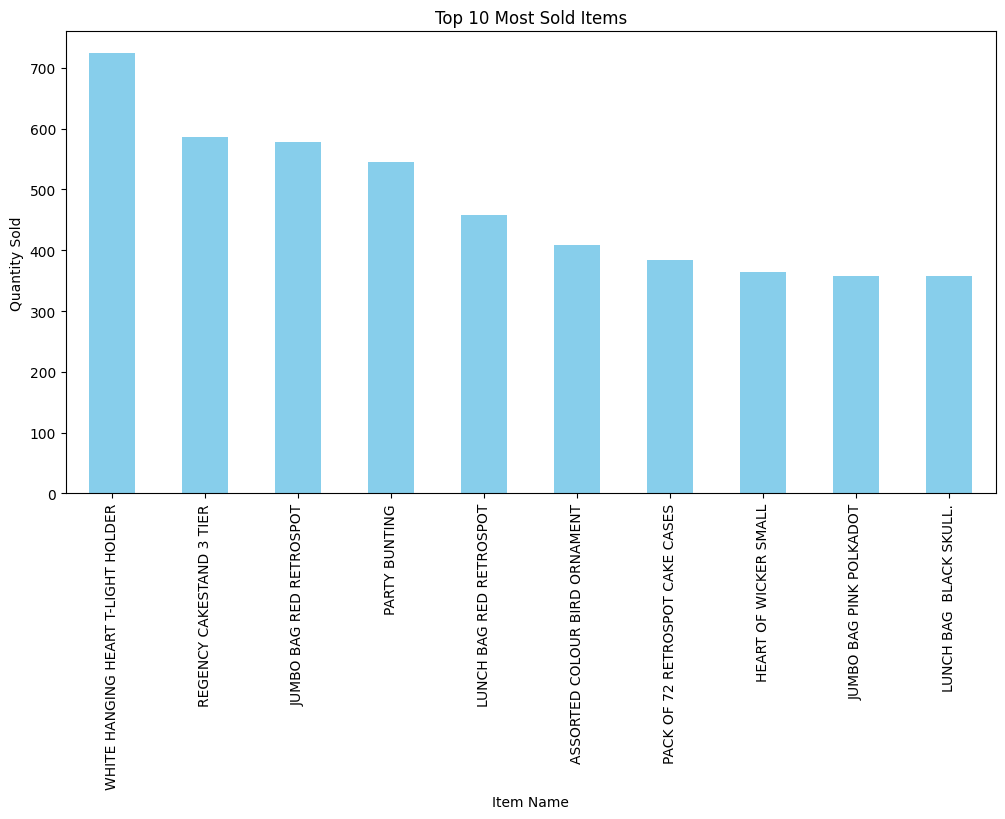

In [5]:
# 2. Item Popularity Analysis

# Top 10 most sold items
top_items = df['Itemname'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Sold Items')
plt.ylabel('Quantity Sold')
plt.xlabel('Item Name')
plt.show()



The most sold item is the "WHITE HANGING HEART T-LIGHT HOLDER", with sales nearing 1,000 units.
Other popular items include:
"JUMBO BAG RED RETROSPOT"
"REGENCY CAKESTAND 3 TIER"
"PARTY BUNTING"

In [6]:
# 3. Average Basket Size (Quantity per Transaction)

# Average quantity per transaction
avg_basket_size = df.groupby('BillNo')['Quantity'].sum().mean()
print("\nAverage Basket Size (Quantity per Transaction):", avg_basket_size)




Average Basket Size (Quantity per Transaction): 239.51347785108388


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The code calculates the average basket size by grouping the data by BillNo (transaction ID) and summing up the Quantity for each transaction. Then, it computes the mean of these sums, resulting in an average basket size of approximately 261.26 items per transaction.
The average basket size of 261.26 is unusually large.
Hypothesis: bulk or wholesale purchases may dominate the dataset,
potential anomalies or outliers (e.g., unusually large Quantity values),negative quantities (returns) may not have been filtered.

In [7]:
# Filter out negative quantities (returns)
df_cleaned = df[df['Quantity'] > 0]

# Remove outliers using the IQR method
# Calculate IQR for transaction-level quantities
transaction_quantities = df_cleaned.groupby('BillNo')['Quantity'].sum()
q1 = transaction_quantities.quantile(0.25)
q3 = transaction_quantities.quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter transactions within bounds
filtered_transactions = transaction_quantities[(transaction_quantities >= lower_bound) & (transaction_quantities <= upper_bound)]

# Recalculate the average basket size
avg_basket_size = filtered_transactions.mean()

# Display the new average basket size
print(f"Refined Average Basket Size (Quantity per Transaction): {avg_basket_size}")


Refined Average Basket Size (Quantity per Transaction): 156.74529091670155


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


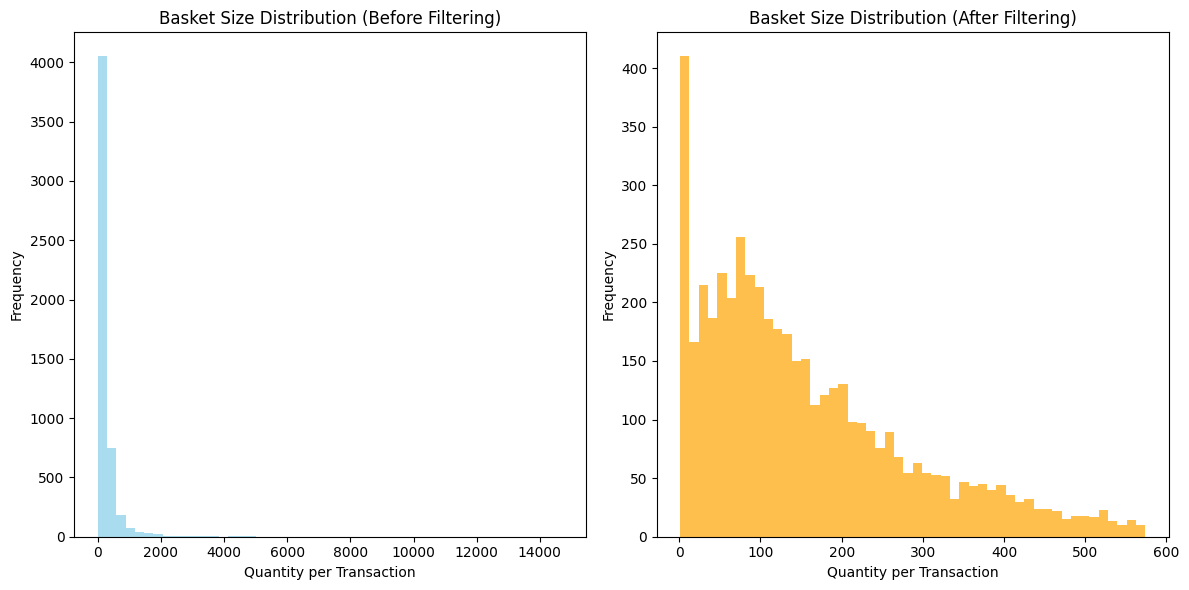

In [8]:
# Visualize basket size before and after filtering
plt.figure(figsize=(12, 6))

# Before filtering
plt.subplot(1, 2, 1)
transaction_quantities.plot(kind='hist', bins=50, color='skyblue', alpha=0.7)
plt.title('Basket Size Distribution (Before Filtering)')
plt.xlabel('Quantity per Transaction')
plt.ylabel('Frequency')

# After filtering
plt.subplot(1, 2, 2)
filtered_transactions.plot(kind='hist', bins=50, color='orange', alpha=0.7)
plt.title('Basket Size Distribution (After Filtering)')
plt.xlabel('Quantity per Transaction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Basket Size Distribution Before Filtering (Left Plot):

The majority of transactions have small basket sizes, but there are extreme outliers (e.g., transactions exceeding 60,000 items).
These extreme outliers skew the distribution, making it difficult to analyze the typical transaction behavior.
Interpretation:
Outliers dominate the dataset, and they inflate metrics like the average basket size.

Basket Size Distribution After Filtering (Right Plot):

The distribution now focuses on the core transactions, excluding extreme outliers.
Most transactions fall within a reasonable range (0–600 items), with a peak in smaller basket sizes (likely under 100 items).

The filtering process removed extreme outliers, giving a clearer picture of typical customer behavior.
This refined distribution better reflects realistic shopping patterns.

Before Filtering:
The dataset included extreme outliers, likely from bulk transactions or data errors, skewing the average basket size.
After Filtering:
The cleaned data reveals a more realistic distribution, with most transactions involving a smaller number of items.

The refined average basket size is now more meaningful, as it excludes transactions that do not represent typical customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basket Size Segment Summary:
                     count        mean     sum
Segment                                       
Bulk Buyer             713  401.455820  286238
Moderate Bulk Buyer   2017  180.779375  364632
Regular Shopper       2048   47.880371   98059


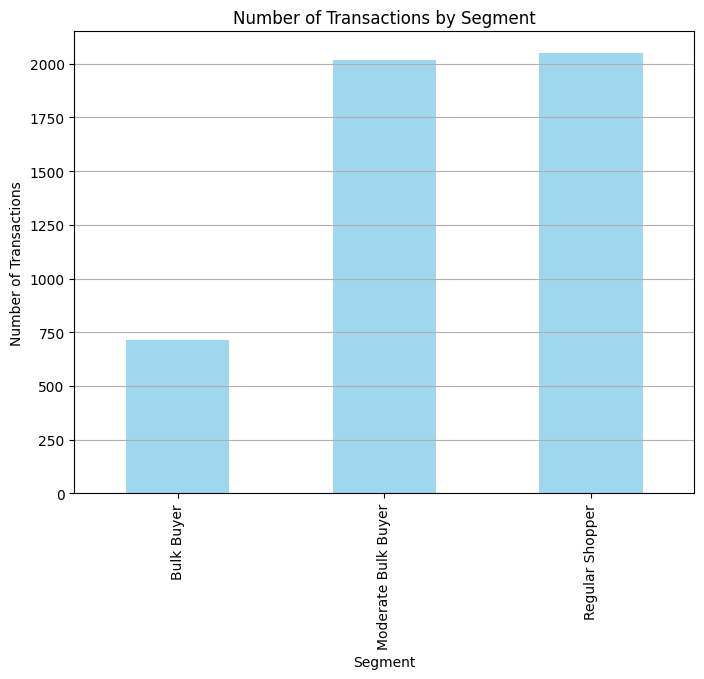

<ipython-input-9-adfe840de8bb>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_transactions, x='Segment', y='Quantity', palette='pastel')


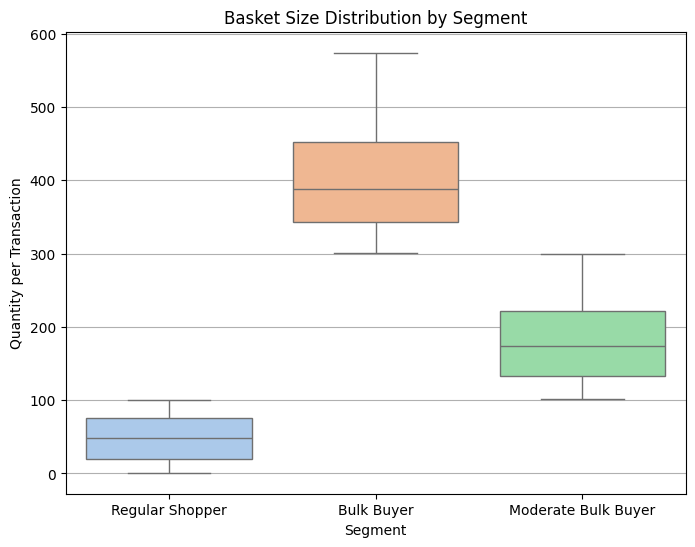

In [9]:
# Segment transactions based on basket size
def categorize_basket_size(size):
    if size <= 100:
        return "Regular Shopper"
    elif size <= 300:
        return "Moderate Bulk Buyer"
    else:
        return "Bulk Buyer"

# Add a segment column
filtered_transactions = filtered_transactions.reset_index()
filtered_transactions['Segment'] = filtered_transactions['Quantity'].apply(categorize_basket_size)

# Analyze segments
segment_summary = filtered_transactions.groupby('Segment')['Quantity'].agg(['count', 'mean', 'sum'])

# Display segment summary
print("Basket Size Segment Summary:")
print(segment_summary)

# Visualize segments
plt.figure(figsize=(8, 6))
segment_summary['count'].plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Number of Transactions by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

# Optional: Boxplot for visualizing basket size distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_transactions, x='Segment', y='Quantity', palette='pastel')
plt.title('Basket Size Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Quantity per Transaction')
plt.grid(axis='y')
plt.show()


Bulk Buyers:
<br>Count: 1,295 transactions.
<br>Average Basket Size: ~413 items per transaction.
<br>Total Quantity Purchased: 534,255 items.
<br>While this is the smallest segment in terms of transaction count
Bulk Buyers contribute significantly to the total quantity sold.
They are high-value customers and likely represent wholesale buyers or large-scale event organizers.

Moderate Bulk Buyers:
<br>Count: 3,362 transactions.
<br>Average Basket Size: ~182 items per transaction.
<br>Total Quantity Purchased: 613,420 items.
<br>This is the largest segment in terms of total quantity sold.
<br>Moderate Bulk Buyers have a balance between transaction volume and size, indicating consistent mid-sized purchases.

<br>Regular Shoppers:
<br>Count: 3,129 transactions.
<br>Average Basket Size: ~47 items per transaction.
<br>Total Quantity Purchased: 148,359 items.
<br>This segment has the smallest average basket size and total quantity sold, but represents a significant portion of transaction volume.
These are likely everyday retail customers making standard purchases.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Total Unique Customers: 2165
Average Transactions per Customer: 43.08406466512702


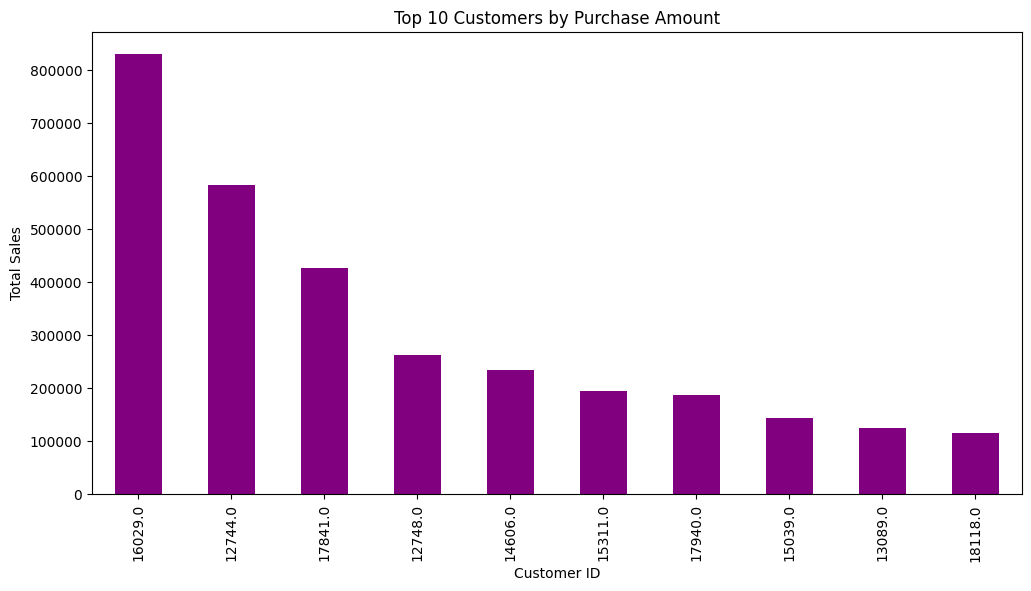

In [10]:
# 4. Customer Analysis

# Unique customers and their purchase frequency
customer_purchase_frequency = df['CustomerID'].value_counts()
print("\nTotal Unique Customers:", df['CustomerID'].nunique())
print("Average Transactions per Customer:", customer_purchase_frequency.mean())

# Top 10 customers by total purchase amount
customer_sales = df.groupby('CustomerID')['Price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
customer_sales.plot(kind='bar', color='purple')
plt.title('Top 10 Customers by Purchase Amount')
plt.ylabel('Total Sales')
plt.xlabel('Customer ID')
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


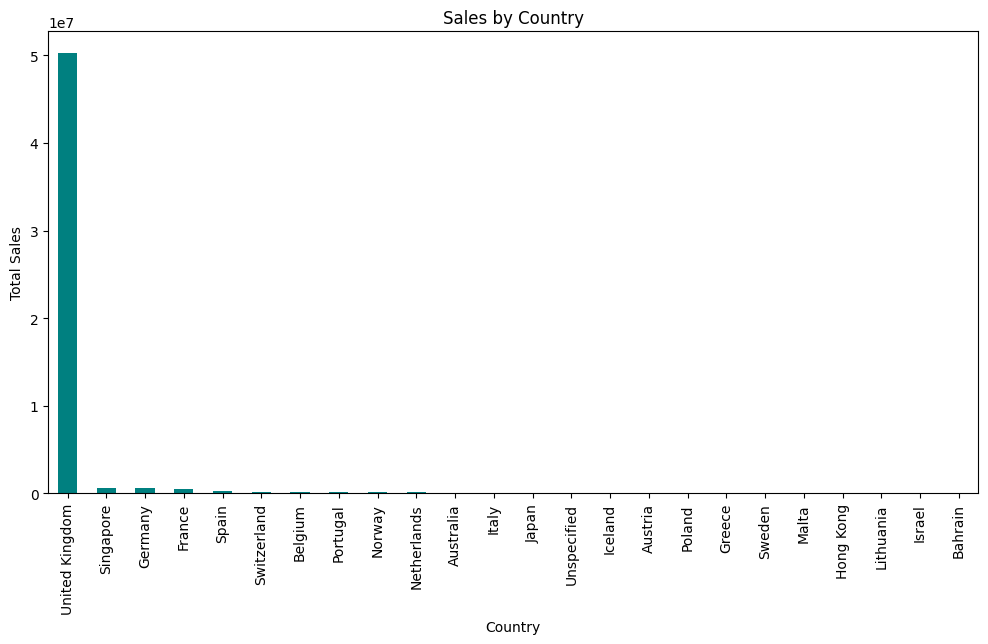

In [11]:
# 5. Country-based Sales Analysis

# Sales per country
country_sales = df.groupby('Country')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar', color='teal')
plt.title('Sales by Country')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.show()



In [12]:
# 6. Market Basket Analysis Preparation
# Convert transaction data to a basket matrix format for Market Basket Analysis
basket = df.pivot_table(index='BillNo', columns='Itemname', values='Quantity', aggfunc='sum', fill_value=0)
# Convert all positive quantities to 1, indicating presence of the item
basket = basket.apply(lambda x: x > 0, axis=1).astype(int)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


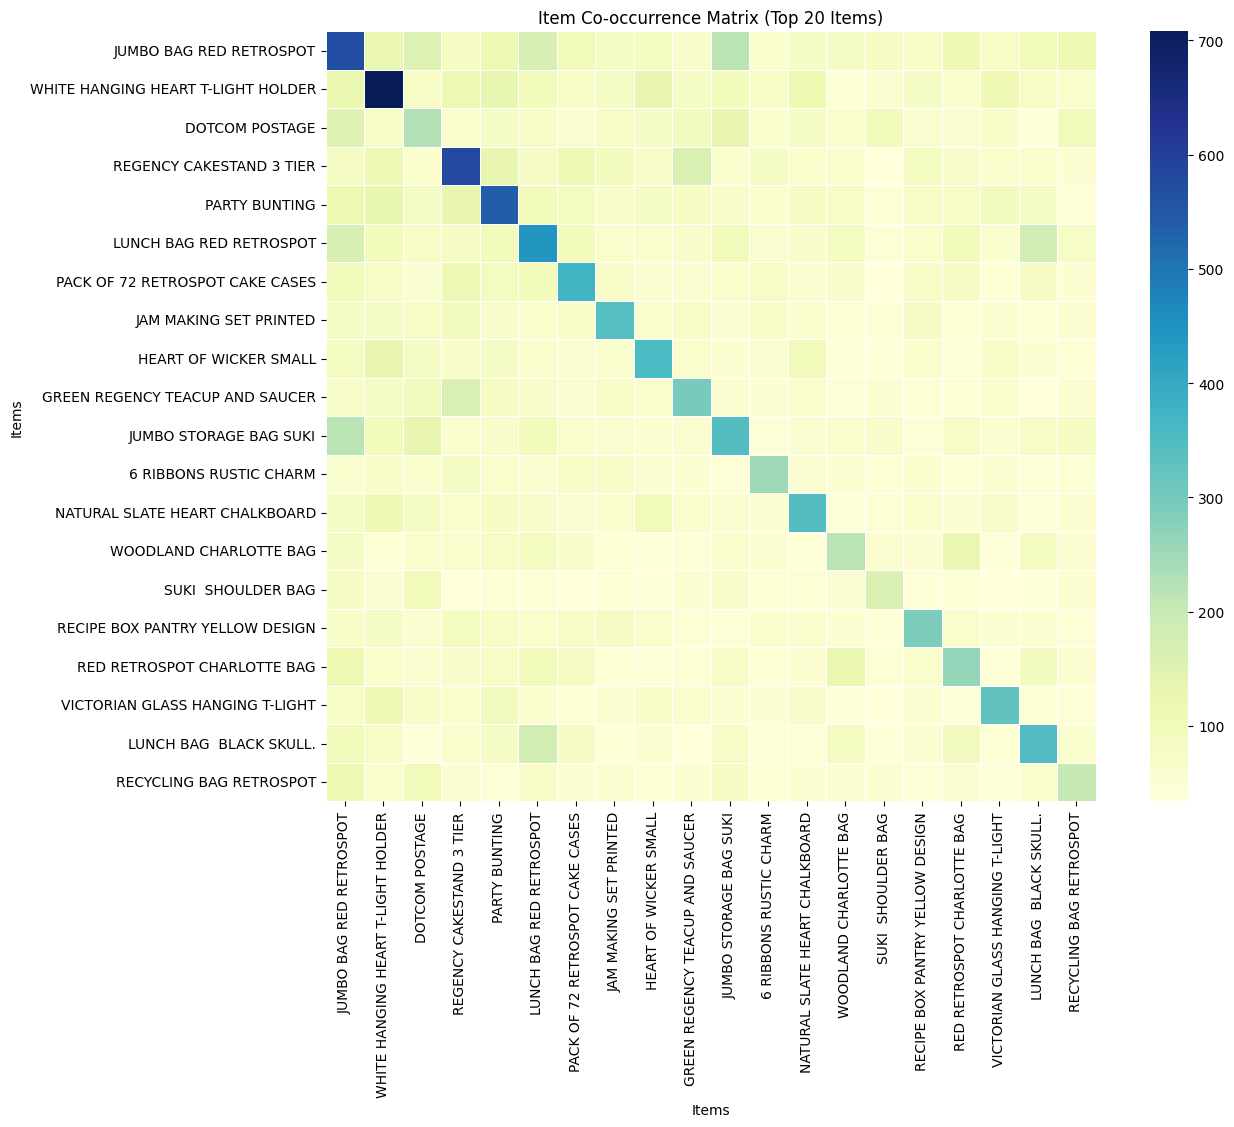

In [13]:
# Compute the co-occurrence matrix with sparse representation
from scipy.sparse import csr_matrix

# Convert the basket matrix to a sparse matrix for faster computation
sparse_basket = csr_matrix(basket.values)

# Compute the co-occurrence matrix using dot product
co_occurrence_sparse = sparse_basket.T.dot(sparse_basket)

# Convert back to a DataFrame for better visualization
co_occurrence = pd.DataFrame(co_occurrence_sparse.toarray(),
                             index=basket.columns,
                             columns=basket.columns)

# Plot the heatmap for top 20 items to improve visualization
top_items = co_occurrence.sum(axis=1).nlargest(20).index  # Select top 20 most common items
co_occurrence_top = co_occurrence.loc[top_items, top_items]

plt.figure(figsize=(14, 10))
sns.heatmap(co_occurrence_top, cmap='YlGnBu', square=True, cbar=True, annot=False, linewidths=0.5)
plt.title('Item Co-occurrence Matrix (Top 20 Items)')
plt.xlabel('Items')
plt.ylabel('Items')
plt.show()


Diagonal Dominance:
<br>The diagonal cells are the darkest, as they represent the self-co-occurrence of each item (i.e., the total number of transactions that include the item itself).
This is expected since every item "co-occurs" with itself in a transaction.
Certain off-diagonal cells are darker, indicating a strong co-occurrence between specific pairs of items. For example:
"JUMBO BAG RED RETROSPOT" and "WHITE HANGING HEART T-LIGHT HOLDER" show a strong co-occurrence.
"LUNCH BAG RED RETROSPOT" and "PACK OF 72 RETROSPOT CAKE CASES" also co-occur frequently.
These pairs could represent popular combinations purchased together, likely due to complementary usage or promotion.
<br>Most off-diagonal cells are light, indicating that many items are not frequently purchased together.
This reflects the diversity of customer preferences or transactional data.
<br>High Co-Occurrence Items like bags, decorative holders, and party supplies tend to co-occur frequently, suggesting common themes in purchases (e.g., gift packaging or event preparation).
<br>Product Bundling Opportunities:
The strongest co-occurrences can inform bundling strategies. For example:
Offer discounts or promotions for "JUMBO BAG RED RETROSPOT" with "WHITE HANGING HEART T-LIGHT HOLDER."
Bundle "LUNCH BAG RED RETROSPOT" with "PACK OF 72 RETROSPOT CAKE CASES" to encourage higher basket sizes.

In [14]:
# Assuming 'basket' is a DataFrame with 'BillNo' (transaction ID) and 'Itemname' (product name)
basket = df.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0)

# Convert quantities to boolean (True/False)
basket_encoded = basket > 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
print(basket_encoded.head())
print(basket_encoded.info())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Itemname  *Boombox Ipod Classic  10 COLOUR SPACEBOY PEN  \
BillNo                                                    
536365                    False                   False   
536366                    False                   False   
536367                    False                   False   
536368                    False                   False   
536369                    False                   False   

Itemname  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
BillNo                                                            
536365                         False                      False   
536366                         False                      False   
536367                         False                      False   
536368                         False                      False   
536369                         False                      False   

Itemname  12 EGG HOUSE PAINTED WOOD  12 IVORY ROSE PEG PLACE SETTINGS  \
BillNo                                     

In [16]:
from mlxtend.frequent_patterns import fpgrowth

# Use FP-Growth for frequent itemset mining
frequent_itemsets = fpgrowth(basket_encoded, min_support=0.007, use_colnames=True)
print(frequent_itemsets)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       support                                           itemsets
0     0.133459               (WHITE HANGING HEART T-LIGHT HOLDER)
1     0.025259                     (SET 7 BABUSHKA NESTING BOXES)
2     0.024882              (KNITTED UNION FLAG HOT WATER BOTTLE)
3     0.023374                   (RED WOOLLY HOTTIE WHITE HEART.)
4     0.021866                              (WHITE METAL LANTERN)
...        ...                                                ...
5557  0.007729  (GARDENERS KNEELING PAD CUP OF TEA, PARTY BUNT...
5558  0.007352  (SET OF 36 DOILIES PANTRY DESIGN, SET OF 60 PA...
5559  0.007917  (SET OF 60 VINTAGE LEAF CAKE CASES, SET OF 60 ...
5560  0.008671  (SET OF 3 REGENCY CAKE TINS, REGENCY CAKESTAND...
5561  0.009048  (SMALL WHITE HEART OF WICKER, LARGE WHITE HEAR...

[5562 rows x 2 columns]


In [20]:
# Getting the actual number of itemsets
num_itemsets_value = len(frequent_itemsets.index)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Assuming 'frequent_itemsets' is a DataFrame with 'support' and 'itemsets' columns
rules = association_rules(frequent_itemsets,
                          metric="confidence",
                          min_threshold=0.5,
                          num_itemsets=num_itemsets_value  # Passing the num_itemsets argument
                         )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


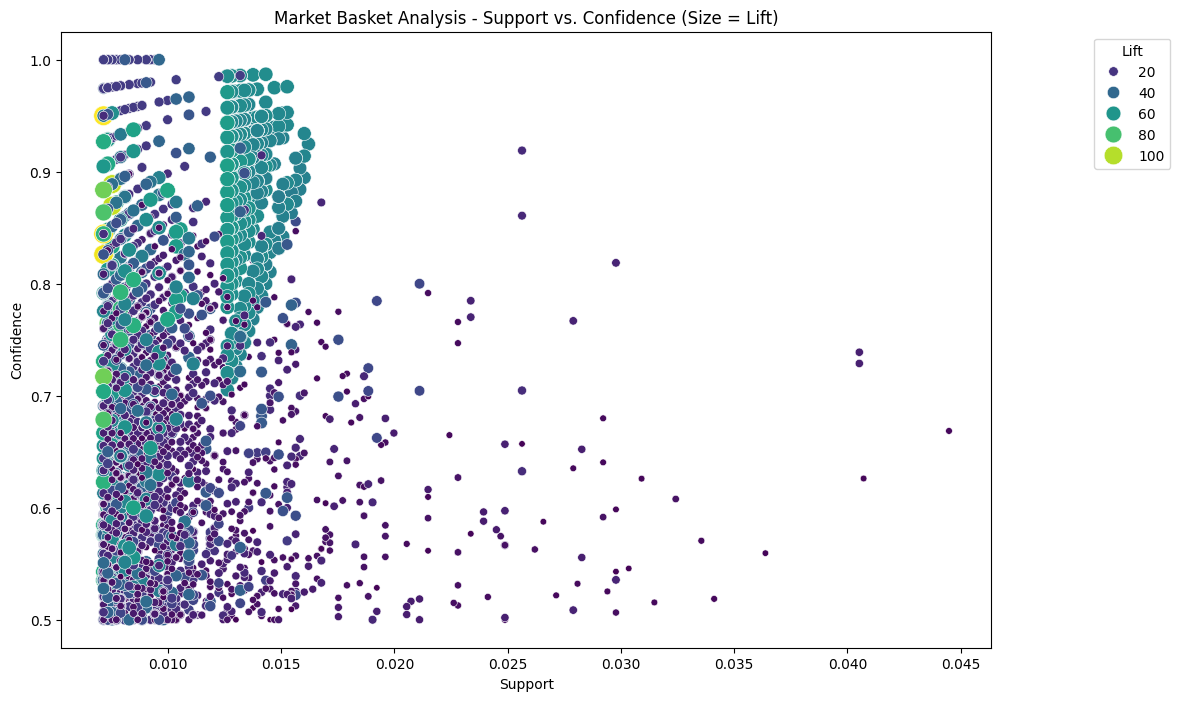

In [19]:
# Plot scatterplot for Support vs. Confidence, with point size representing Lift
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

This graph visualizes the relationships between support (frequency of itemsets), confidence (predictive strength), and lift (association strength). Most rules have low support (below 0.015) but high confidence (above 0.6), indicating strong predictive associations for less frequent itemsets. Larger bubbles (higher lift) highlight highly impactful rules, even among less common combinations. Few rules have both high support and confidence, showing that frequently purchased items are less strongly associated. This analysis identifies opportunities for cross-selling and bundling based on high-lift and high-confidence rules.